In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:20,.2f}'.format
import folium
import json
folium.__version__ == '0.5.0'
%matplotlib inline


# Assignment 1: Eurostat

**We load data from this database:** http://ec.europa.eu/eurostat/data/database

**Data we choose:** http://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&plugin=1&pcode=teilm021&language=en

**Metadata**: http://ec.europa.eu/eurostat/cache/metadata/en/une_esms.htm
   - Data are presented in seasonally adjusted form.

**Json GeoData:** https://github.com/codeforamerica/click_that_hood/tree/master/public/data

**Harmonised unemployment rate by sex - age group 15-24**

The unemployment rate represents unemployed persons as a percentage of the labour force based on International Labour Office (ILO) definition, which here refers to the total number of employed and unemployed persons aged 15 to 24. 

Unemployed persons comprise here persons aged 15 to 24 who: 
   - are without work; 
   - are available to start work within the next two weeks; 
   - and have been actively seeking work in the past four weeks or had already found a job to start within the next three months. 

**Unit:** Percentage of active population.

**Age: ** Less than 25 years, From 25 to 74 years, Total

**Sex:** Males, Females, Total

**Countries:** (We selected just countries form EU):
'Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Germany',
       'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Croatia',
       'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary',
       'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom'

**Time:** July 2017 & July 2016. The most recent & complete data was july 2017, so we decided to compare those data.

In [27]:
data = pd.read_csv('eu-unemployment.csv')
data = data[ data['UNIT']== 'Percentage of active population']
data=data[['GEO','TIME','AGE','SEX','Value']]
data.head()

,GEO,TIME,AGE,SEX,Value
3,Belgium,2016M07,Total,Total,7.9
4,Belgium,2016M07,Total,Males,7.9
5,Belgium,2016M07,Total,Females,7.9
9,Belgium,2016M07,Less than 25 years,Total,20.7
10,Belgium,2016M07,Less than 25 years,Males,21.8


In [86]:
data2017 = data[(data['TIME'] == '2017M07') & (data['SEX']=='Total') & (data['AGE']=='Total')]
data2017 = data2017[['GEO','Value']]
data2017 = data2017.replace(to_replace=':',value=-1)
data2016 = data[(data['TIME'] == '2016M07') & (data['SEX']=='Total') & (data['AGE']=='Total')]
data2016 = data2016[['GEO','Value']]
data2016 = data2016.replace(to_replace=':',value=-1)

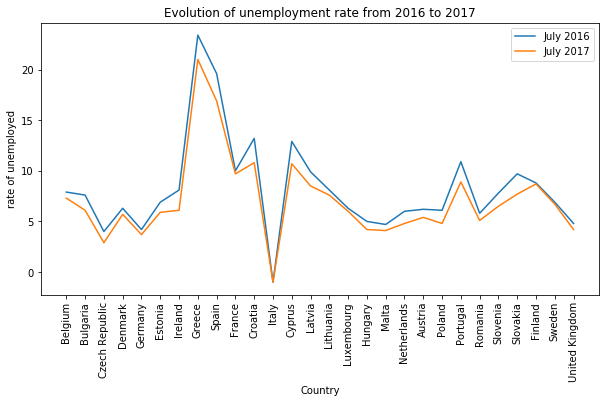

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
x = [i for i in np.arange(0, len(data2016))]
plt.xticks(x, data2016['GEO'], rotation='vertical')
ax.plot(x, data2016['Value'])
ax.plot(x, data2017['Value'])
ax.set_ylabel("rate of unemployed")
ax.set_xlabel("Country")
ax.legend(["July 2016", "July 2017"])
plt.title('Evolution of unemployment rate from 2016 to 2017')

In [92]:
data2017M = data[(data['TIME'] == '2017M07') & (data['SEX']=='Males') & (data['AGE']=='Total')]
data2017M = data2017M[['GEO','Value']]
data2017M = data2017M.replace(to_replace=':',value=-1)
data2017F = data[(data['TIME'] == '2016M07') & (data['SEX']=='Females') & (data['AGE']=='Total')]
data2017F = data2017F[['GEO','Value']]
data2017F = data2017F.replace(to_replace=':',value=-1)

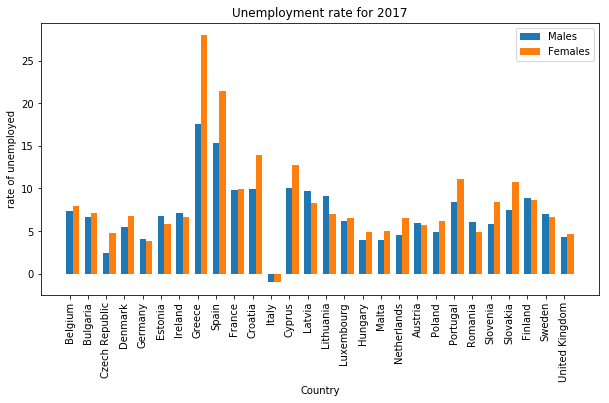

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(data2017M))  # the x locations for the groups
width = 0.35       # the width of the barsplt.xticks(x, data2017M['GEO'], rotation='vertical')
plt.xticks(x, data2016['GEO'], rotation='vertical')
ax.bar(ind, data2017M['Value'],width)
ax.bar(ind + width, data2017F['Value'],width)
ax.set_ylabel("rate of unemployed")
ax.set_xlabel("Country")
ax.legend(["Males", "Females"])
plt.title('Unemployment rate for 2017')

In [115]:
data2017['Value'] = pd.to_numeric(data2017['Value'])

In [118]:
europe_geo_path = r'europe.geojson'
m_eu = folium.Map([50,20], tiles='cartodbpositron', zoom_start=4)
m_eu.choropleth(geo_data=europe_geo_path, data=data2017,
             columns=['GEO','Value'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Total Unemployment Rate (%) July 2017')
m_eu

In [119]:
m_eu.save('UE_unemployment.html')

# Assignement 2


Taux de chômage : Nombre de chômeurs inscrits au jour de référence (dernier jour du mois) divisé par le nombre de personnes actives, multiplié par 100. Le nombre des personnes actives est recensé chaque année par l’Office fédéral de la statistique dans le cadre du relevé structurel (recensement de la population). Il s’élève, depuis le 1<sup>er</sup> janvier 2014, à 4'493'249 personnes d’après le pooling de trois ans des données récoltées dans le cadre des relevés structurels de 2012 à 2014. Le nombre des personnes actives utilisé par le SECO comprend aussi les diplomates et fonctionnaires internationaux domiciliés en Suisse.
source: https://www.amstat.ch/v2/definition.jsp?lang=fr

First we downloaded excel file representing the unemployment rate in Switzerland by canton. We chose to take the rate of 2017 (from January to September).

In [5]:
unemploymentRateByCantons = pd.read_excel('tauxDeChomage.xlsx')
unemploymentRateByCantons = {'cantons': unemploymentRateByCantons.Canton[1:], 'unemploymentRate': unemploymentRateByCantons.Total[1:]}
unemploymentRateByCantons = pd.DataFrame(data=unemploymentRateByCantons)
unemploymentRateByCantons.unemploymentRate = unemploymentRateByCantons.unemploymentRate.astype(float)

In [6]:
cantonsGeoPath = r'switzerland.geojson'
mSwiss = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwiss.choropleth(geo_data=cantonsGeoPath, data=unemploymentRateByCantons,
             columns=['cantons', 'unemploymentRate'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Unemployment rate (%) - June 2017 -')
mSwiss

In [7]:
unemploymentData = pd.read_excel('jobSeeker.xlsx',header=2)
#We delete the columns and row we don't want to sum
unemploymentData = unemploymentData.drop('Mois', 1)
unemploymentData = unemploymentData.drop(unemploymentData.index[-1],0)

cantons = unemploymentData.iloc[:,0]
unemployed = pd.DataFrame(data = unemploymentData.iloc[:,1::2])
unemployed = unemployed.set_index(cantons)
unemployed = unemployed.groupby(['Canton']).sum()/12
unemployed = unemployed.sum(axis=1)

jobSeeker = unemploymentData.iloc[:,::2]
jobSeeker = jobSeeker.groupby(['Canton']).sum()/12
jobSeeker = jobSeeker.sum(axis=1)

cantons = cantons.drop(cantons.index[0])

In [8]:
totalActive = pd.DataFrame(columns = ['Canton','TotalActivePopulation'])
for canton in cantons:
    totalActive.loc[len(totalActive)] = [canton,(int(unemployed[canton]*100 / unemploymentRateByCantons[unemploymentRateByCantons['cantons'] == canton]['unemploymentRate'].values[0]))]

unemployedWithoutJobSeeker = pd.DataFrame(columns = ['Canton','ratio'])
for canton in cantons:
    unemployedWithoutJobSeeker.loc[len(unemployedWithoutJobSeeker)] = [canton,(unemployed[canton] - jobSeeker.loc[canton]) / totalActive[totalActive['Canton'] == canton]['TotalActivePopulation'].values[0]*100]
                                                                       
                                                                       
                                                                       
cantonsGeoPath = r'switzerland.geojson'
mSwissJobSeeker = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwissJobSeeker.choropleth(geo_data=cantonsGeoPath, data=unemployedWithoutJobSeeker,
             columns=['Canton', 'ratio'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Unemployment rate without the jobseeker(%) - June 2017 -')
mSwissJobSeeker

In [9]:
percentOfJobSeeker = pd.DataFrame(columns = ['Canton','Percent of jobSeeker'])
for canton in cantons:
    percentOfJobSeeker.loc[len(percentOfJobSeeker)] = [canton,(jobSeeker.loc[canton] / unemployed[canton])*100]

cantonsGeoPath = r'switzerland.geojson'
mSwissJobSeeker = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwissJobSeeker.choropleth(geo_data=cantonsGeoPath, data=percentOfJobSeeker,
             columns=['Canton', 'Percent of jobSeeker'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Employed people looking for a job (%) - June 2017 -')
mSwissJobSeeker